### Модел 3: Моделирање со помош на Beta распределба
#### Анализа на податоците

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy as sp

from scipy.stats import kstest

%matplotlib inline

#### Поставување на влезен/излезен folder

In [2]:
data_in = '../data/dataset/03_m3_beta_distr_01a_data_extraction'

plots_out = '../plots/03_m3_beta_distr'

if not os.path.exists(plots_out):
    os.makedirs(plots_out)

#### Читање на влезните податоци

In [3]:
ad_hoc_pre_arr = np.load(f'{data_in}/ad_hoc_pre.npy')
ad_hoc_pst_arr = np.load(f'{data_in}/ad_hoc_pst.npy')
ad_hoc_all_arr = np.load(f'{data_in}/ad_hoc_all.npy')

planned_pre_arr = np.load(f'{data_in}/planned_pre.npy')
planned_pst_arr = np.load(f'{data_in}/planned_pst.npy')
planned_all_arr = np.load(f'{data_in}/planned_all.npy')

external_arr = np.load(f'{data_in}/external.npy')

#### Хистограми

In [4]:
alpha   = 0.4  # opacity (проѕирност)
bins    = 50
density = True

##### Хистограм за Ad-Hoc посети (сите, пред, после)

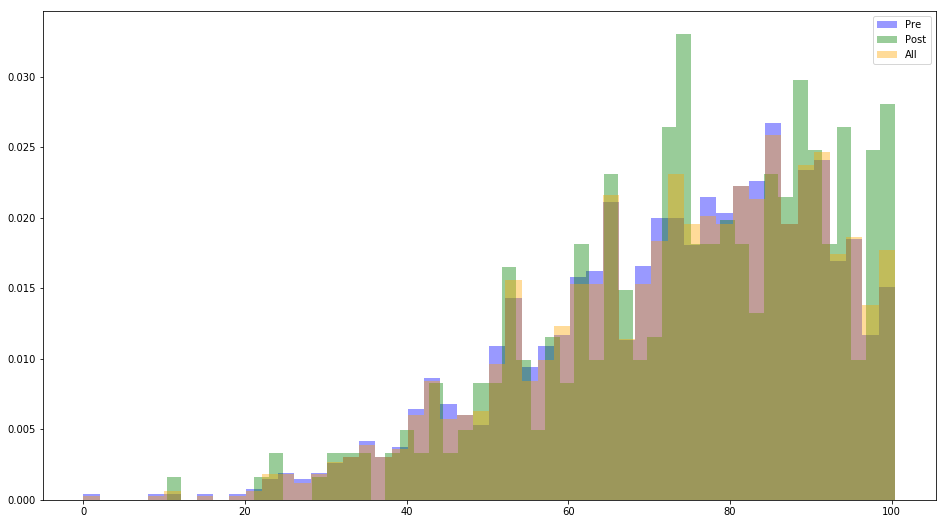

In [5]:
plt.figure(figsize=(16, 9))
plt.hist(ad_hoc_pre_arr, alpha=alpha, bins=bins, density=density, color='blue')
plt.hist(ad_hoc_pst_arr, alpha=alpha, bins=bins, density=density, color='green')
plt.hist(ad_hoc_all_arr, alpha=alpha, bins=bins, density=density, color='orange')

plt.legend(['Pre', 'Post', 'All'])
plt.show()

##### Хистограм за планираните посети (сите, пред, после)

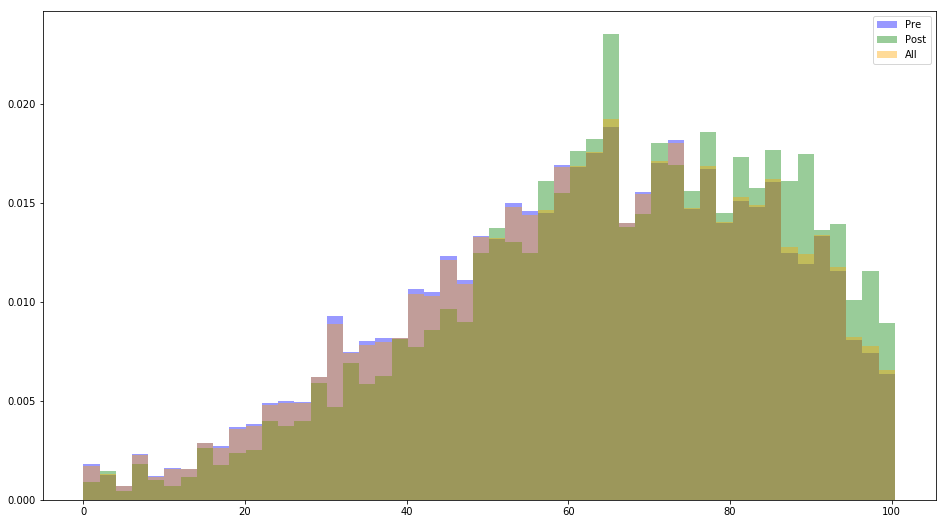

In [6]:
plt.figure(figsize=(16, 9))
plt.hist(planned_pre_arr, alpha=alpha, bins=bins, density=density, color='blue')
plt.hist(planned_pst_arr, alpha=alpha, bins=bins, density=density, color='green')
plt.hist(planned_all_arr, alpha=alpha, bins=bins, density=density, color='orange')

plt.legend(['Pre', 'Post', 'All'])
plt.show()

##### Хистограм за контролните посети (сите)

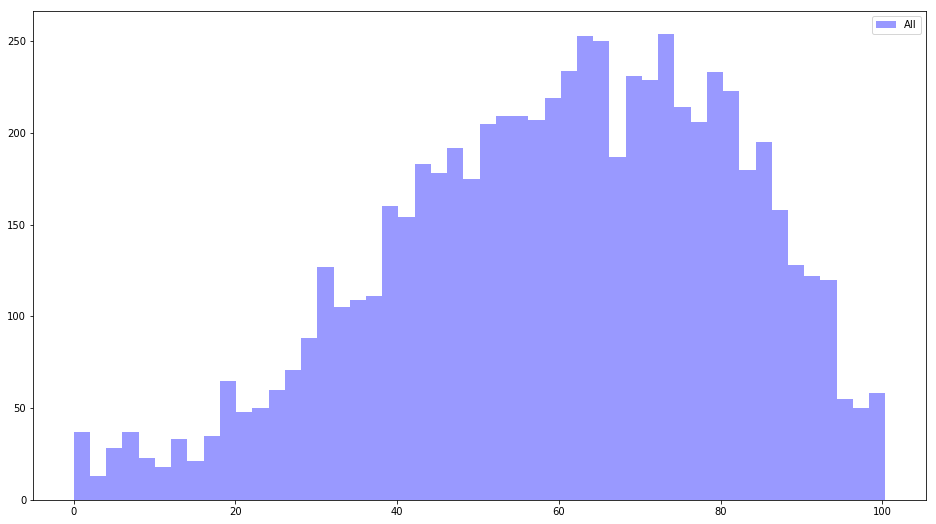

In [7]:
plt.figure(figsize=(16, 9))
plt.hist(external_arr, alpha=alpha, bins=bins, color='blue')
plt.legend(['All'])
plt.show()

#### Тестови на распределби

- ##### <a href="https://en.wikipedia.org/wiki/Beta_distribution">Beta distribution</a>

In [24]:
def beta_dist_fit_plot(arr, bins=25, title=''):
    n = 1000
    x = np.arange(0, 1 + 1/n, 1/n)
    
    alpha, beta, loc, scale = sp.stats.beta.fit(arr)
    
    mean   = alpha / (alpha + beta)
    median = (alpha - (1/3)) / (alpha + beta - (2/3))
    mode   = (alpha - 1) / (alpha + beta - 2)

    print(f'Mean: {mean:.2f}', end=' | ')
    print(f'Median: {median:.2f}', end=' | ')
#     print(f'Mode: {mode:.2f}')
    
    print(kstest(arr, 'beta', [alpha, beta]))

    plt.figure(figsize=(16, 9))

    plt.hist(arr, alpha=0.4, bins=bins, density=density, color='blue')

    plt.plot(x, sp.stats.beta.pdf(x, alpha, beta), color='r')
    plt.xticks(np.arange(0, 1+1e-10, 0.1), np.arange(0, 100+1e-10, 10))
    
    plt.axvline(mean,   color='g')
    plt.axvline(median, color='purple')
#     plt.axvline(mode,   color='black')

    plt.title(f'{title}')
    plt.legend([f'Beta ({alpha:.2f}, {beta:.2f})',
                f'Средна вредност ({mean * 100:.2f})',
                f'Медијана ({median * 100:.2f})'],  # 'Mode'
               loc=2)
    plt.savefig(f'{plots_out}/{title}')

    plt.show()
    
    return

##### Ad-hoc посета (пред контрола)

Mean: 0.74 | Median: 0.77 | KstestResult(statistic=0.05266784159854859, pvalue=0.0012564296345249915)


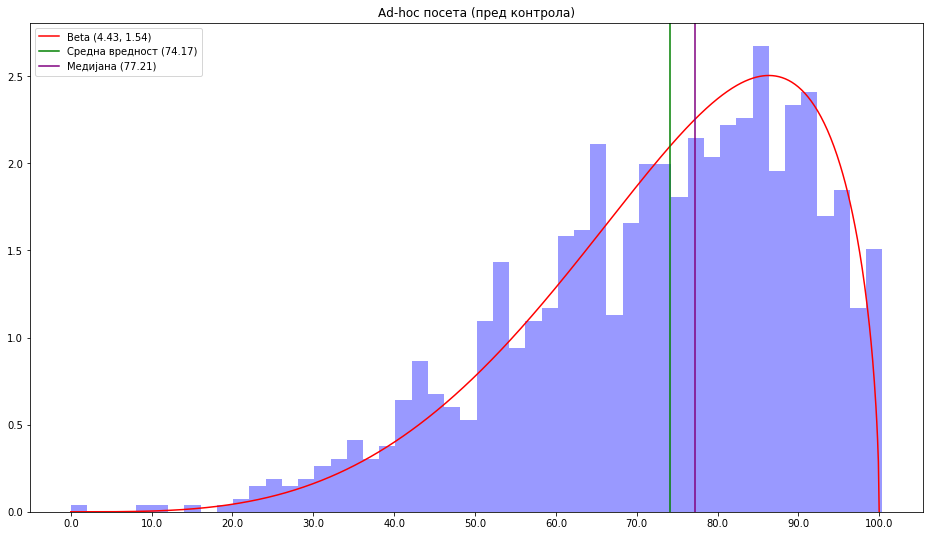

In [25]:
beta_dist_fit_plot(ad_hoc_pre_arr / 100, bins=bins,
                   title='Аd-hoc посета (пред контрола)')

##### Ad-hoc посета (после контрола)

/opt/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Mean: 0.74 | Median: 0.79 | KstestResult(statistic=0.04878165291861511, pvalue=0.39129295878492454)


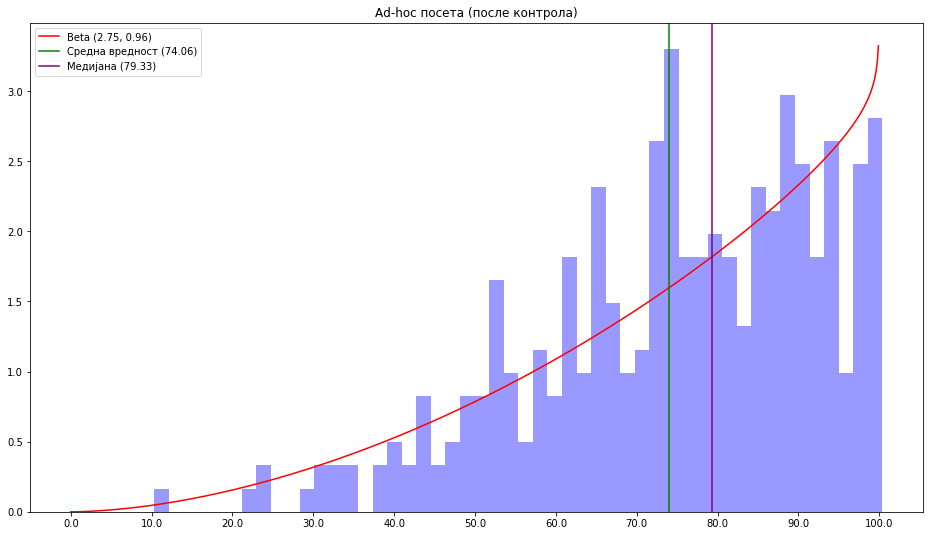

In [26]:
beta_dist_fit_plot(ad_hoc_pst_arr / 100, bins=bins,
                   title='Ad-hoc посета (после контрола)')

##### Ad-hoc посета (вкупно)

Mean: 0.74 | Median: 0.77 | KstestResult(statistic=0.040504122472857174, pvalue=0.00843555847069033)


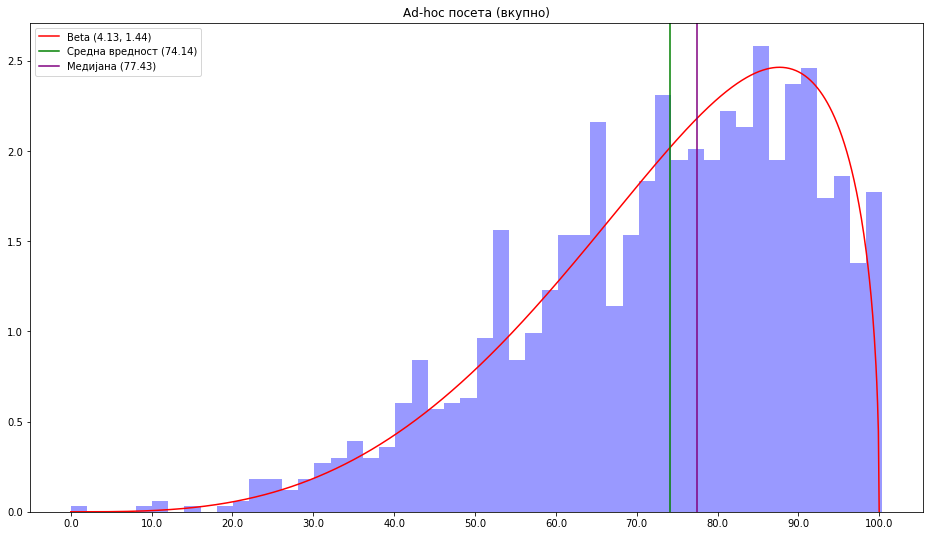

In [27]:
beta_dist_fit_plot(ad_hoc_all_arr / 100, bins=bins,
                   title='Ad-hoc посета (вкупно)')

##### Планиранa посетa (пред контрола)

/opt/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Mean: 0.65 | Median: 0.67 | KstestResult(statistic=0.05560753152495734, pvalue=5.407464308952868e-217)


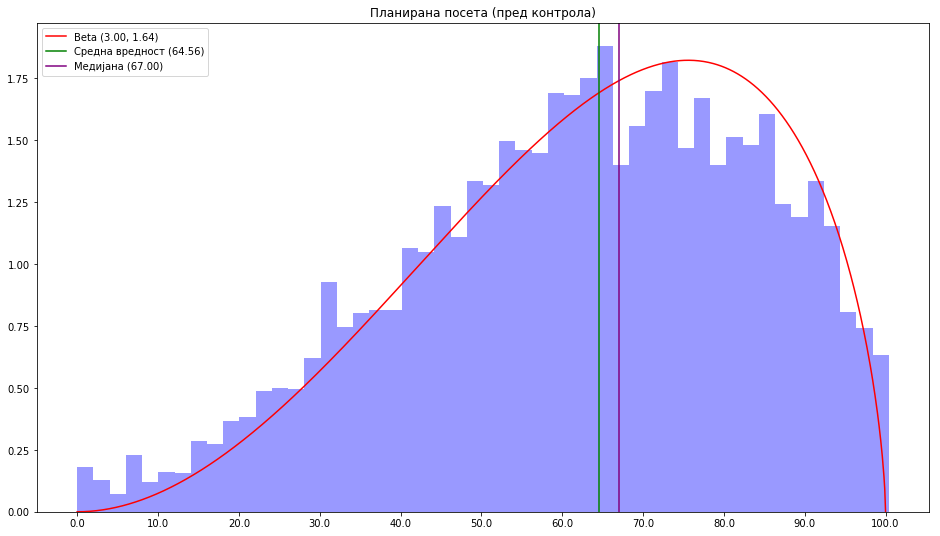

In [28]:
beta_dist_fit_plot(planned_pre_arr / 100, bins=bins,
                   title='Планирана посета (пред контрола)')

##### Планирана посета (после контрола)

Mean: 0.68 | Median: 0.71 | KstestResult(statistic=0.07198660345501906, pvalue=6.787107252065884e-35)


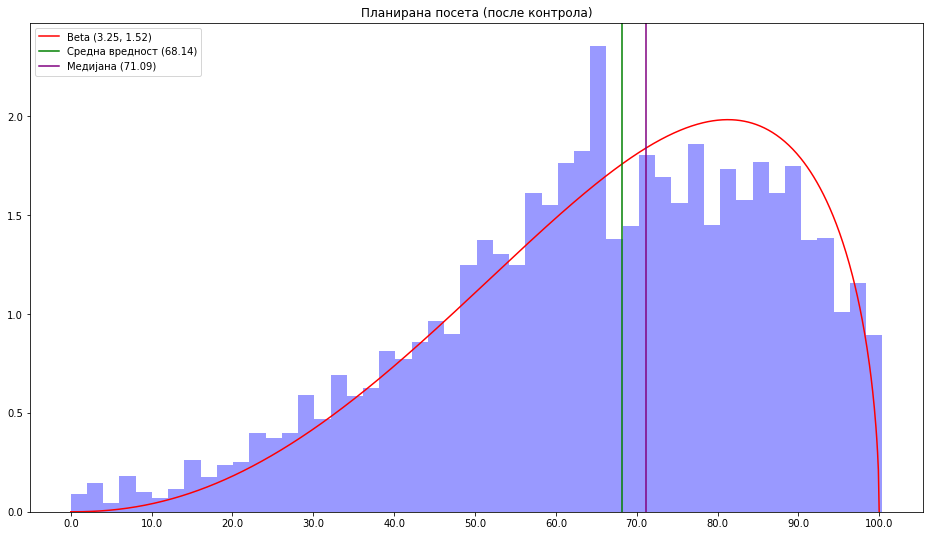

In [29]:
beta_dist_fit_plot(planned_pst_arr / 100, bins=bins,
                   title='Планирана посета (после контрола)')

##### Планирана посета (вкупно)

Mean: 0.65 | Median: 0.67 | KstestResult(statistic=0.056843911901496846, pvalue=3.1808161984092773e-248)


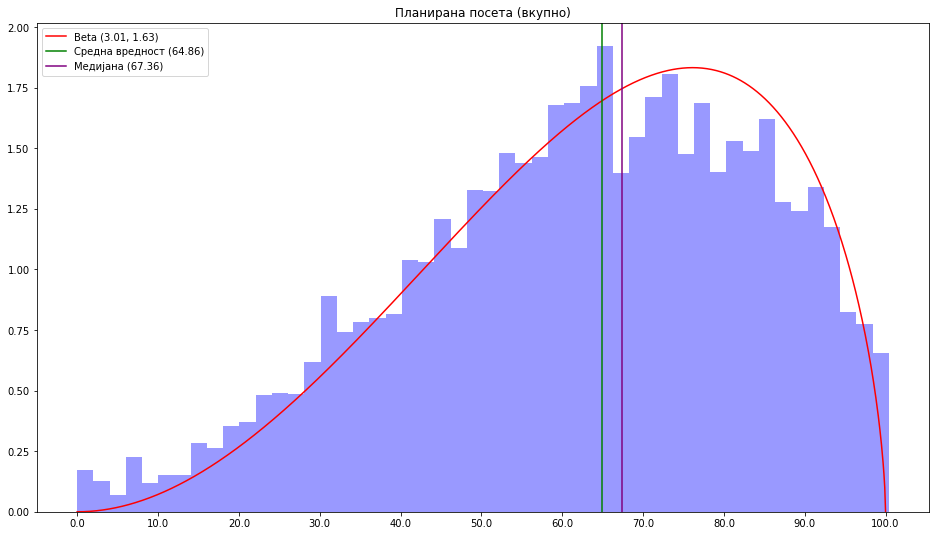

In [30]:
beta_dist_fit_plot(planned_all_arr / 100, bins=bins,
                   title='Планирана посета (вкупно)')

##### Контролни посети (вкупно)

Mean: 0.65 | Median: 0.67 | KstestResult(statistic=0.10609397907149903, pvalue=2.0313000009542654e-66)


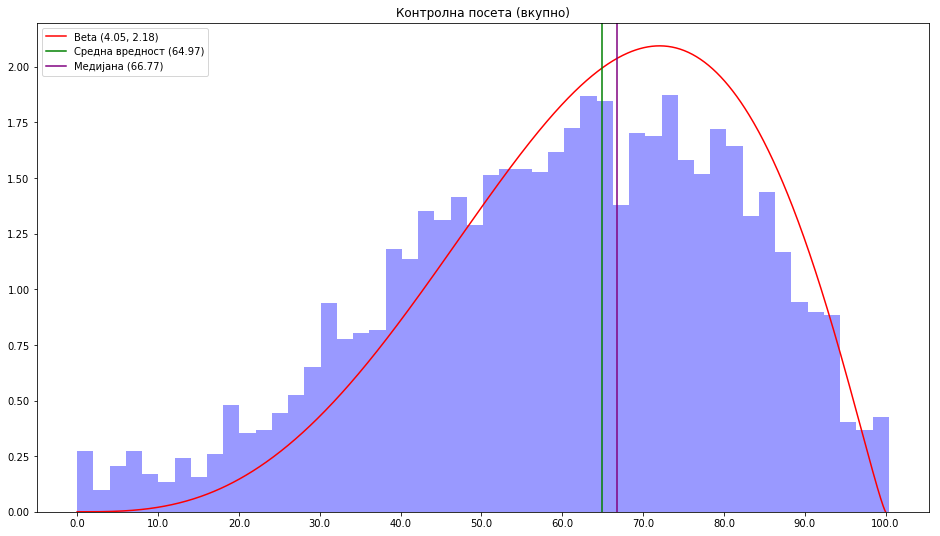

In [31]:
beta_dist_fit_plot(external_arr / 100, bins=bins,
                   title='Контролна посета (вкупно)')